### Bikesharing Case Study

## Objectives
Understand the relationship between Demand and Predictors'\n'
Which predictor is significant
Understand how those predictors control demand
Use Statsmodel technique to get a better interpretation
Use weekdays and other categoric variable labels for better interpretability. Eg. Weather Sit, Days of the week etc.
Keep the number of Variables in the final model to less than 10
Keep in mind the assumptions with residual analysis

### Importing Datasets & Prep

In [26]:
#Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import chardet as cd
#%matplotlib

from sklearn.metrics import r2_score

In [27]:
#checking for encoding
with open("D:\\MS AI ML\\Machine Learning 1\\Bike Sharing Assignment\\day.csv","rb") as rawdata:
    rdres = cd.detect(rawdata.read(1000))
print(rdres)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [28]:
#Reading the CSV file and using encoding of 'UTF-8'
#bkshr=pd.read_csv("D:\\MS AI ML\\Machine Learning 1\\Bike Sharing Assignment\\day.csv",encoding='ISO-8859-1')
bkshr=pd.read_csv("D:\\MS AI ML\\Machine Learning 1\\Bike Sharing Assignment\\day.csv",encoding='utf-8')
#Checking if data is being read from the file.
bkshr.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [29]:
#Checking for Null values - There are no columns with null values as per the info
bkshr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [30]:
#dropping month as year (dteday) are already extracted available in other columns
#dropping instant as index is already present
bkshr=bkshr.drop(['dteday'],axis=1)
bkshr=bkshr.drop(['instant'],axis=1)
bkshr=bkshr.drop(['casual'],axis=1)
bkshr=bkshr.drop(['registered'],axis=1)

In [31]:
bkshr

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [32]:
#Checking on the makeup of the DataFrame
bkshr.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## Visualizing Data

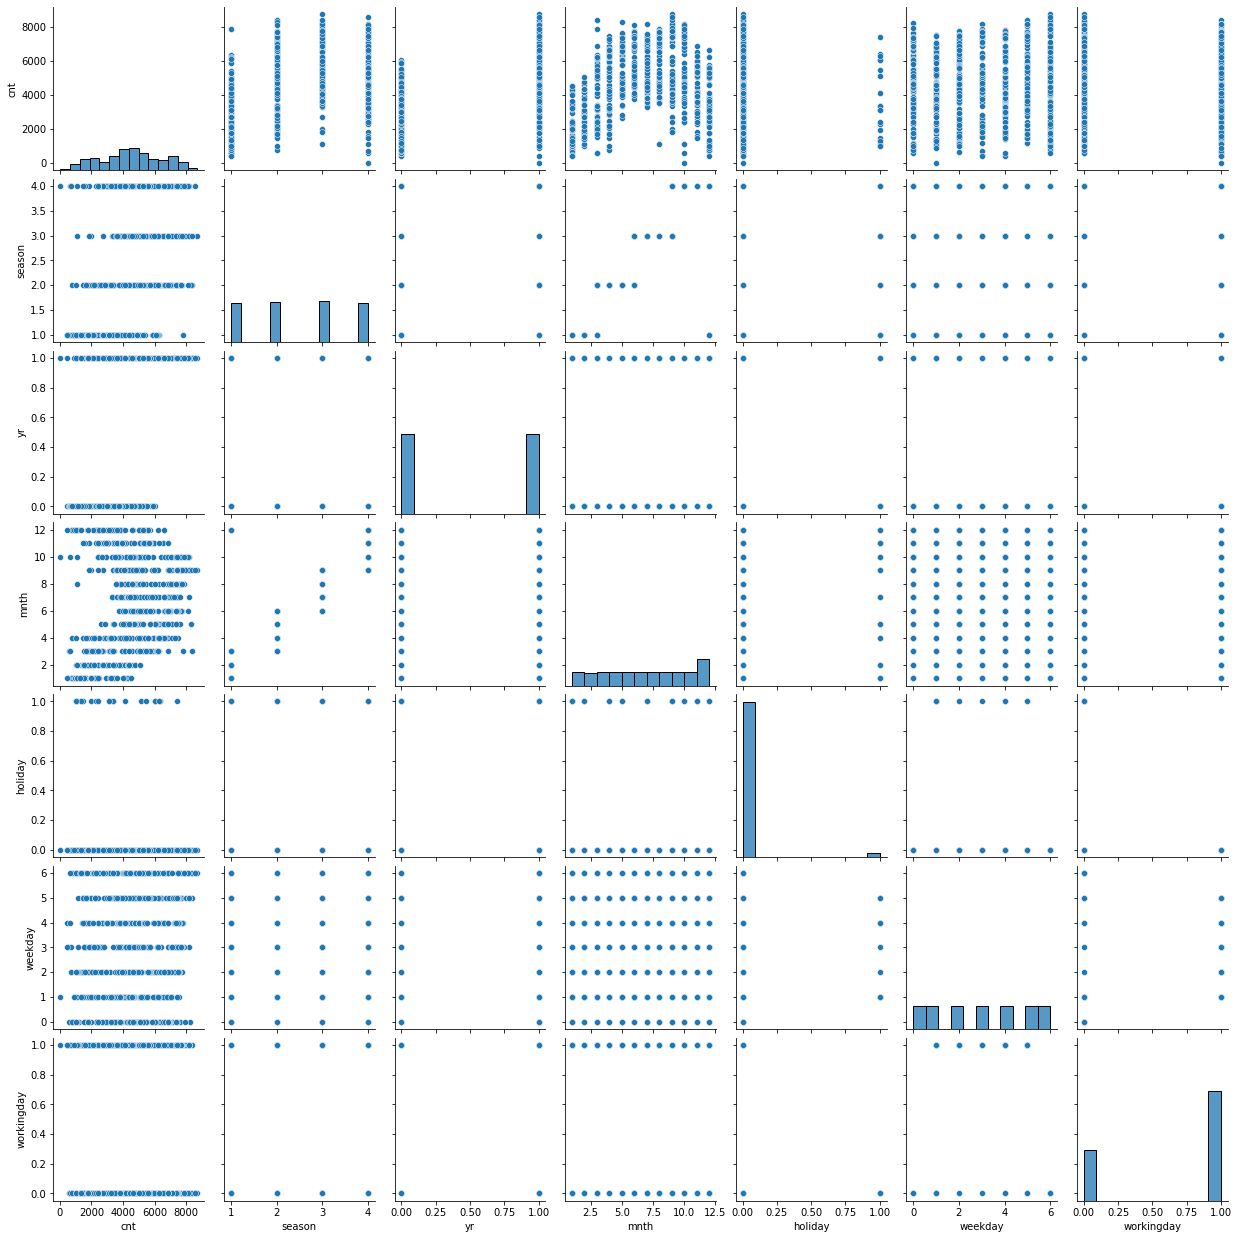

In [33]:
#count versus Categorical variables using pairplot to compare sidebyside
#There is not too much that can be infered from this pairplot as it is quite busy

bkshr_cat =bkshr [['cnt','season','yr','mnth','holiday','weekday','workingday']]
sns.pairplot(bkshr_cat)
plt.show()

### Count versus Continuous Variables using pariplot to compare side by side
There is not too much that can be infered from this pairplot as it is quite busy. <br>
There is only one thing that draws ones attention. The is weak realationship between atemp and cnt as per the scatterplot. <br>
Also as expected temp and atemp show a positive linear correlation showing these are related and one could be dropped for the the other during the analysis. <br>

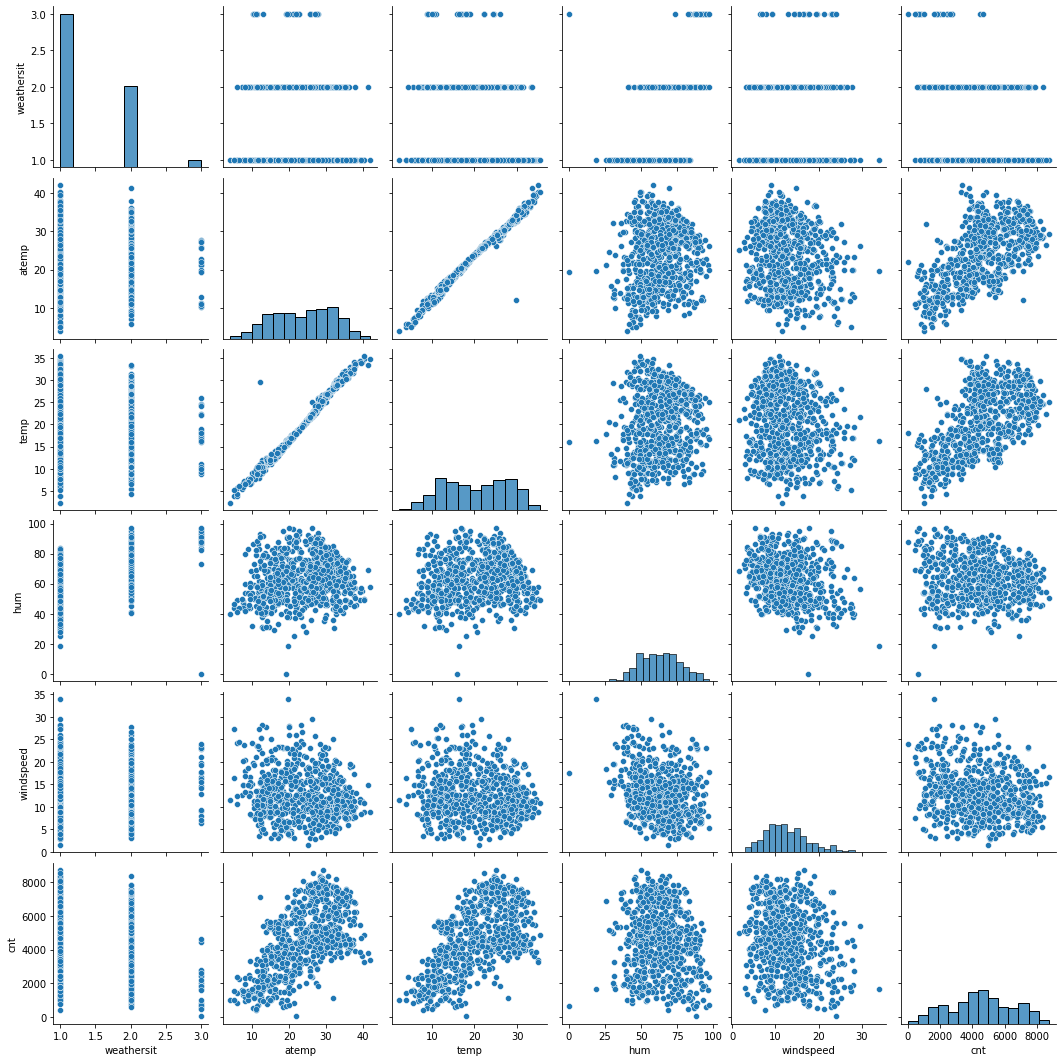

In [34]:
bkshr_num =bkshr [['weathersit','atemp','temp','hum','windspeed','cnt']]
sns.pairplot(bkshr_num)
plt.show()

### Creating a Scatterplot for Side by Side comparison on trend
Only atemp shows any likelihood of a positive linear relationship <br>
Only one among atemp & temp was chosen as both showed a very high linear realtionship in the pariplot <br>

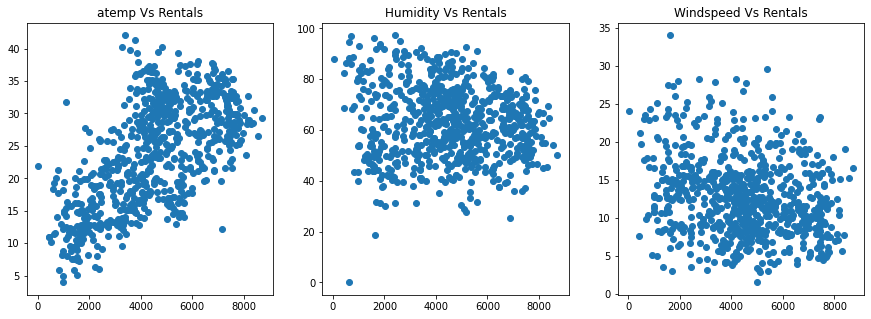

In [35]:
plt.figure(figsize=(15,5))
plot = plt.subplot(1,3,1)
plt.scatter(bkshr.cnt,bkshr.atemp)
plt.title("atemp Vs Rentals")
plot = plt.subplot(1,3,2)
plt.scatter(bkshr.cnt,bkshr.hum)
plt.title("Humidity Vs Rentals")
plot = plt.subplot(1,3,3)
plt.scatter(bkshr.cnt,bkshr.windspeed)
plt.title("Windspeed Vs Rentals")

plt.show()

### Creating Heatmap for checking correation between numeric varibales

Temprature (atemp) has fairly strong correlation to Count of Rentals <br>
Other variables are not seen to have strong relationship, however this is not conclusive that there are insignificant

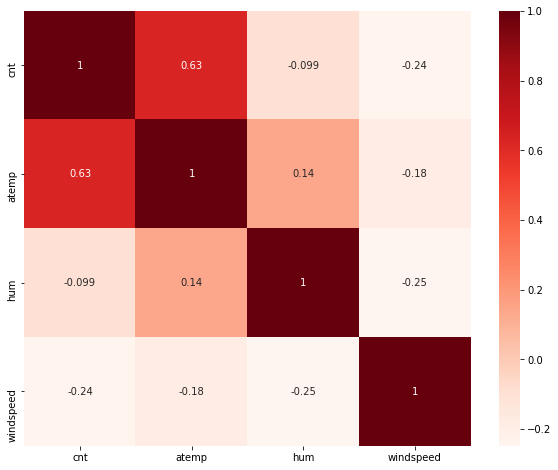

In [36]:
##Creating a heatamp
pv_hmp=bkshr[["cnt","atemp","hum","windspeed"]]
plt.figure(figsize=(10,8))
hmpcorr=pv_hmp.corr()
sns.heatmap(hmpcorr,annot=True,cmap='Reds')
plt.show()

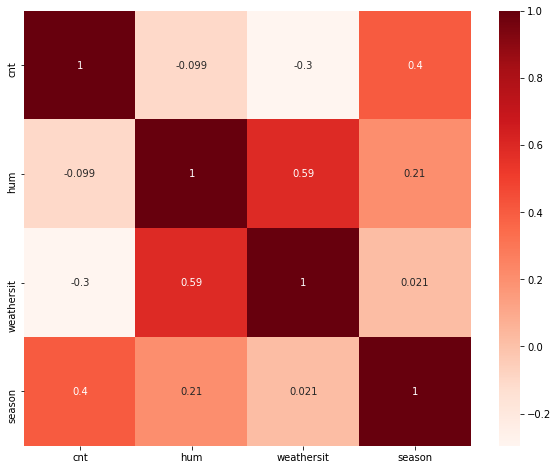

In [37]:
pv_hmp_hum_wsit=bkshr[["cnt","hum","weathersit",'season']]
plt.figure(figsize=(10,8))
hmp_hum_wsit_corr=pv_hmp_hum_wsit.corr()
sns.heatmap(hmp_hum_wsit_corr,annot=True,cmap='Reds')
plt.show()

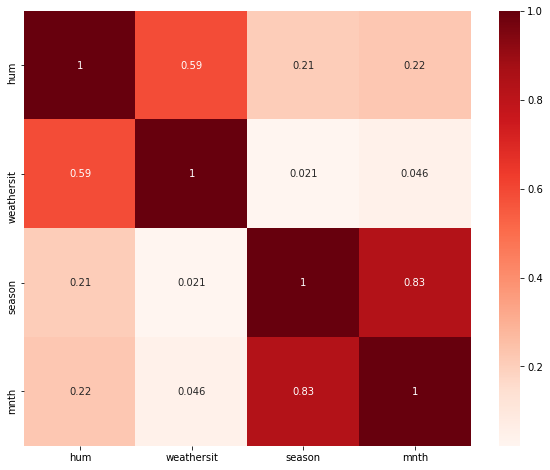

In [38]:
pv_hmp_drvd=bkshr[['hum',"weathersit",'season','mnth']]
plt.figure(figsize=(10,8))
pv_hmp_drvd_corr=pv_hmp_drvd.corr()
sns.heatmap(pv_hmp_drvd_corr,annot=True,cmap='Reds')
plt.show()

## Step 3 : Analysis of Categorical Variables

Converting Categorical variable to have categories rather than numerical values

1. weathersit
2. months
3. Weekdays
4. season
5. workking days

In [39]:
bkshr2=bkshr.copy(deep=True)

In [40]:
bkshr2.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


### Variables where varying categories were used. Run only once!

In [41]:
bkshr2['weathersit'] = bkshr2['weathersit'].map({1 : 'clr', 2  : 'Misty', 3 : 'Light Snow', 4 : 'HeavyRain and Fog'})
bkshr2.weekday=bkshr2.weekday.map({0 : 'Sunday' , 1 : 'Monday', 2 : 'Tuesday', 3 : 'Wednesday', 4 : 'Thursday', 5 : 'Friday', 6 : 'Saturday'})
bkshr2.mnth=bkshr2.mnth.map({1 : 'Jan' , 2 :'Feb', 3 : 'Mar', 4 : 'Apr', 5 : 'May', 6 : 'Jun', 7 : 'Jul', 8 : 'Aug', 9 : 'Sep', 10 : 'Oct', 11 : 'Nov', 12 : 'Dec'})
bkshr2.season=bkshr2.season.map({1 : 'spring' , 2 :'summer', 3 : 'fall', 4 : 'winter'})

In [42]:
#sanity check
bkshr2.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,clr,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,clr,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,clr,9.305237,11.46350,43.6957,12.522300,1600


In [43]:
#creating a df for category analysis with boxplots
bkshr_cat =bkshr2 [['cnt','season','yr','mnth','holiday','weekday','workingday','weathersit']]
bkshr_cat

,cnt,season,yr,mnth,holiday,weekday,workingday,weathersit
0,985,spring,0,Jan,0,Saturday,0,Misty
1,801,spring,0,Jan,0,Sunday,0,Misty
2,1349,spring,0,Jan,0,Monday,1,clr
3,1562,spring,0,Jan,0,Tuesday,1,clr
4,1600,spring,0,Jan,0,Wednesday,1,clr
...,...,...,...,...,...,...,...,...
725,2114,spring,1,Dec,0,Thursday,1,Misty
726,3095,spring,1,Dec,0,Friday,1,Misty
727,1341,spring,1,Dec,0,Saturday,0,Misty
728,1796,spring,1,Dec,0,Sunday,0,clr


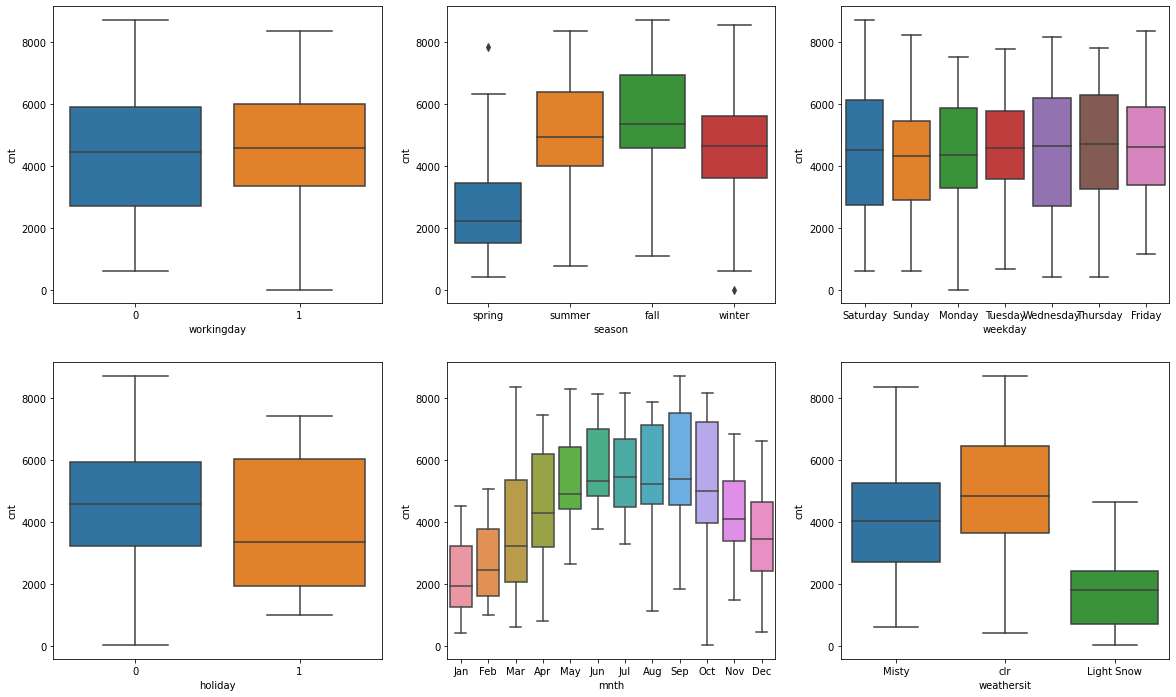

In [44]:
#creating Boxplots
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(data=bkshr_cat,x='workingday',y='cnt')
plt.subplot(2,3,2)
sns.boxplot(data=bkshr_cat,y='cnt',x='season')
plt.subplot(2,3,3)
sns.boxplot(data=bkshr_cat,y='cnt',x='weekday')
plt.subplot(2,3,4)
sns.boxplot(data=bkshr_cat,y='cnt',x='holiday')
plt.subplot(2,3,5)
sns.boxplot(data=bkshr_cat,y='cnt',x='mnth')
plt.subplot(2,3,6)
sns.boxplot(data=bkshr_cat,y='cnt',x='weathersit')
plt.show()

1. No significant Diffrence betweek weekday and Non-workingday except that non-working day has lower values in lower quantiles<br>
2. Data shows that rentals are overall higher in Summer and Fall with higher means and higher levels of upper quantiles.<br>
3. May to Sep shows increased rentals<br>

### Derived Metrics

A derived metric of rentals by season by year was taken into account to see if there was a significant rise in the percentage of rentals for the given periods.<br>
There is no significant difference that can be ascertained by looking at the percent per season in the two years. The overall rentals have grown as any business would expect.

In [45]:
#del df_drvd_mtrcs
df_drvd_mtrcs=bkshr.copy(deep=True)
df_drvd_mtrcs.yr=df_drvd_mtrcs.yr.map({0 : "2018", 1 : "2019"})
df_drvd_mtrcs.season=df_drvd_mtrcs.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [46]:
#Membership by season
pvt_drvd_cnt_seas=pd.pivot_table(data=df_drvd_mtrcs,index=['yr','season'],values='cnt',aggfunc=sum)
group1=pvt_drvd_cnt_seas.groupby(['yr','season'])
pd_grp_seas=group1.sum()
pd_grp_seas.reset_index(inplace=True)
pd_grp_seas

,yr,season,cnt
0,2018,fall,419650
1,2018,spring,150000
2,2018,summer,347316
3,2018,winter,326137
4,2019,fall,641479
5,2019,spring,319514
6,2019,summer,571273
7,2019,winter,515476


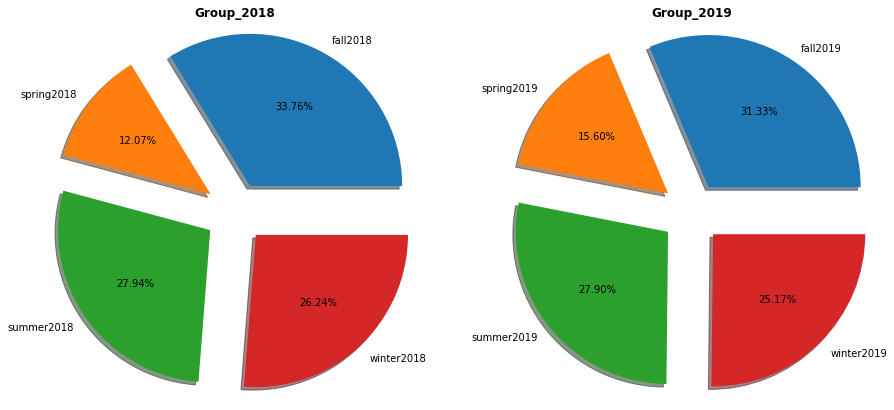

In [47]:
#Dervied Categorical Metric of Membership by Year by Season
group_2018=pd_grp_seas[pd_grp_seas['yr']=='2018']
group_2019=pd_grp_seas[pd_grp_seas['yr']=='2019']
labels_1=group_2018['season']+group_2018['yr']
labels_2=group_2019['season']+group_2019['yr']
explode=(0.2,0.2,0.2,0.2)
plt.figure(figsize=(15,15))
plot=plt.subplot(1,2,1)
plt.pie(data=group_2018,x='cnt',labels=labels_1,explode=explode,shadow='True',autopct='%1.2f%%')
plot.set_title("Group_2018",weight='bold') 
plot=plt.subplot(1,2,2)
plt.pie(data=group_2019,x='cnt',labels=labels_2,explode=explode,shadow='True',autopct='%1.2f%%')
plot.set_title("Group_2019",weight='bold') 
plt.show()

### Preparing Data

In [48]:
# Dummy Data for Month

#month_dummy
month_dummy=pd.get_dummies(bkshr2['mnth'],drop_first=True)
Jan=month_dummy['Jan']
Feb=month_dummy['Feb']
Mar=month_dummy['Mar']
#Apr=month_dummy['Apr']
May=month_dummy['May']
Jun=month_dummy['Jun']
Jul=month_dummy['Jul']
Aug=month_dummy['Aug']
Sep=month_dummy['Sep']
Oct=month_dummy['Oct']
Nov=month_dummy['Nov']
Dec=month_dummy['Dec']

#season_dummy
season_dummy=pd.get_dummies(bkshr2['season'],drop_first=True)

#fall=season_dummy['fall']
summer=season_dummy['summer']
winter=season_dummy['winter']
spring=season_dummy['spring']

#weekday_dummy
weekday_dummy=pd.get_dummies(bkshr2['weekday'],drop_first=True)

Sunday=weekday_dummy['Sunday']
Monday=weekday_dummy['Monday']
Tuesday=weekday_dummy['Tuesday']
Wednesday=weekday_dummy['Wednesday']
Thursday=weekday_dummy['Thursday']
#Friday=weekday_dummy['Friday']
Saturday=weekday_dummy['Saturday']

# weathersit_dummy
weathersit_dummy=pd.get_dummies(bkshr2['weathersit'],drop_first=True)

#Light=weathersit_dummy['Light Snow']
Misty=weathersit_dummy['Misty']
clear=weathersit_dummy['clr']

In [49]:
month_dummy

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


### Running ANOVA


A one way Annova way was carried out to help to understand the significance of categorical variables. <br>
The one-way ANOVA tests whether the mean of some numeric variable differs across the levels of one categorical variable. <br>
It essentially answers the question: do any of the group means differ from one another? <br>

In [50]:
import scipy
from scipy import stats
#Annova for Month
#stats.f_oneway(Jan, Feb, Mar,May, Jun, Jul, Aug, Sep, Oct, Nov, Dec)

The test output yields an F-statistic of =0.058 and a p-value of 0.99), indicating that there is significant difference between the means of each group.

In [51]:
#Annova for season
#stats.f_oneway(fall, summer, winter, spring)

The test output yields an F-statistic of =0.143 and a p-value of 0.933858), indicating that there is significant difference between the means of each group.

In [52]:
#Annova for weekdat
#stats.f_oneway(Sunday,Monday,Tuesday,Wednesday, Thursday, Friday, Saturday)

The test output yields an F-statistic of 0.0063 and a p-value of 0.99), indicating that there is significant difference between the means of each group.

In [53]:
#Annova for weathersit
#stats.f_oneway(Light,Misty,clear)

The test output yields an F-statistic of 414.74 and a p-value of 1.9501058896744864e-153, indicating that there is no significant difference between the means of each group.

In [54]:
bkshr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


## Manual Modeling
### Some manual modeling to understand data - R^2 & F (stats)

#### 1. Run Model with all variables and month dummy
Dummy data taken for month as month has 12 levels and therefore warrants a dummy data

In [120]:
#del bkshr_mdl_1
#Take out Casual and Registered
#concatenate month_dummy & drop month
bkshr_mdl1=bkshr[['season','yr','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','cnt']]
bkshr_mdl1=pd.concat([bkshr,month_dummy],axis=1)
bkshr_mdl1.drop('mnth',axis=1,inplace=True)
bkshr_mdl1

,season,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1,0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,2,14.902598,17.68695,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,1,1,1,8.050924,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,2,1,1,8.200000,10.60610,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,3,1,1,9.305237,11.46350,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,0,4,1,2,10.420847,11.33210,65.2917,23.458911,...,1,0,0,0,0,0,0,0,0,0
726,1,1,0,5,1,2,10.386653,12.75230,59.0000,10.416557,...,1,0,0,0,0,0,0,0,0,0
727,1,1,0,6,0,2,10.386653,12.12000,75.2917,8.333661,...,1,0,0,0,0,0,0,0,0,0
728,1,1,0,0,0,1,10.489153,11.58500,48.3333,23.500518,...,1,0,0,0,0,0,0,0,0,0


### Splitting data into training and test

In [56]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(bkshr,train_size=0.7,test_size=0.3,random_state=100)

In [57]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      510 non-null    int64  
 1   yr          510 non-null    int64  
 2   mnth        510 non-null    int64  
 3   holiday     510 non-null    int64  
 4   weekday     510 non-null    int64  
 5   workingday  510 non-null    int64  
 6   weathersit  510 non-null    int64  
 7   temp        510 non-null    float64
 8   atemp       510 non-null    float64
 9   hum         510 non-null    float64
 10  windspeed   510 non-null    float64
 11  cnt         510 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 51.8 KB


#### Rescaling
Transforming and fitting numeric variables so that they are on the same scale os the other categoric variables for accurate modeling.

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
numeric_vars=['atemp','temp','hum','windspeed','cnt']
df_train[numeric_vars]=scaler.fit_transform(df_train[numeric_vars])

<ipython-input-58-bc4ff5037417>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[numeric_vars]=scaler.fit_transform(df_train[numeric_vars])
c:\users\sunny\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [59]:
df_train.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,2.517647,0.507843,6.549020,0.025490,2.990196,0.676471,1.401961,0.537262,0.512989,0.650369,0.320768,0.513620
std,1.111947,0.500429,3.468714,0.157763,2.017093,0.468282,0.547540,0.225844,0.212385,0.145882,0.169797,0.224593
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Declaring y-train and poping 'cnt' from x_train

In [60]:
y_train=df_train.pop('cnt')
#del xtrain
#del x_train
x_train=df_train
x_train.info()
#df_train

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      510 non-null    int64  
 1   yr          510 non-null    int64  
 2   mnth        510 non-null    int64  
 3   holiday     510 non-null    int64  
 4   weekday     510 non-null    int64  
 5   workingday  510 non-null    int64  
 6   weathersit  510 non-null    int64  
 7   temp        510 non-null    float64
 8   atemp       510 non-null    float64
 9   hum         510 non-null    float64
 10  windspeed   510 non-null    float64
dtypes: float64(4), int64(7)
memory usage: 47.8 KB


### Creating Model

In [61]:
import statsmodels.api as sm

In [62]:
#Evaluated with atemp
x_train_lm = sm.add_constant(x_train[['atemp']])
#x_train_lm = sm.add_constant(x_train[['atemp','hum']])
lr=sm.OLS(y_train,x_train_lm).fit()
x_train_lm

,const,atemp
653,1.0,0.501133
576,1.0,0.766351
426,1.0,0.438975
728,1.0,0.200348
482,1.0,0.391735
...,...,...
526,1.0,0.762183
578,1.0,0.824359
53,1.0,0.218747
350,1.0,0.223544


In [63]:
lr.params
#x_train_lm

const    0.162924
atemp    0.683633
dtype: float64

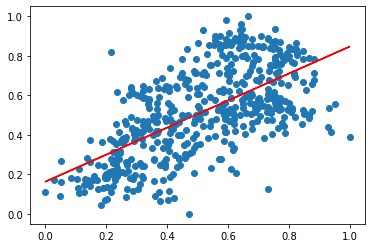

In [64]:
plt.scatter(x_train_lm.iloc[:,1],y_train)
plt.plot(x_train_lm.iloc[:,1],0.162924+0.683633*x_train_lm.iloc[:,1],'r')
plt.show()

In [65]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Sat, 23 Jan 2021   Prob (F-statistic):           1.10e-61
Time:                        20:44:52   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.020      8.199      0.0

#### Note: Summary of the manual model shows a not very high R2 or adjusted R2 value and indicates that optimization is possible.

### Adding another variable

In [66]:
x_train_lm = sm.add_constant(x_train[['atemp','weathersit']])
lr=sm.OLS(y_train,x_train_lm).fit()

In [67]:
x_train['weathersit']

653    1
576    1
426    2
728    1
482    2
      ..
526    2
578    1
53     1
350    2
79     2
Name: weathersit, Length: 510, dtype: int64

In [68]:
lr.params

const         0.307127
atemp         0.658949
weathersit   -0.093826
dtype: float64

In [69]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     224.5
Date:                Sat, 23 Jan 2021   Prob (F-statistic):           1.46e-70
Time:                        20:44:53   Log-Likelihood:                 200.26
No. Observations:                 510   AIC:                            -394.5
Df Residuals:                     507   BIC:                            -381.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3071      0.028     10.993      0.0

#### Note: Summary of the manual model with a predictor added shows a slightly higher R2 or adjusted R2 value.

### Checking VIF
The formula for calculating `VIF` is:
#### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [70]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      510 non-null    int64  
 1   yr          510 non-null    int64  
 2   mnth        510 non-null    int64  
 3   holiday     510 non-null    int64  
 4   weekday     510 non-null    int64  
 5   workingday  510 non-null    int64  
 6   weathersit  510 non-null    int64  
 7   temp        510 non-null    float64
 8   atemp       510 non-null    float64
 9   hum         510 non-null    float64
 10  windspeed   510 non-null    float64
dtypes: float64(4), int64(7)
memory usage: 47.8 KB


In [72]:
#x_train.drop('dteday',axis=1,inplace=True)
#x_train.reset_index(inplace=True)
#x_train.drop('holiday',axis=1,inplace=True)
#x_train.drop('workingday',axis=1,inplace=True)
x_train.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [73]:
vifbkshr=pd.DataFrame()
vifbkshr['Features'] = x_train.columns
vifbkshr['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vifbkshr['VIF'] = round(vifbkshr['VIF'],2)
vifbkshr = vifbkshr.sort_values(by = 'VIF', ascending = True )
vifbkshr

,Features,VIF
3,holiday,1.09
1,yr,2.01
4,weekday,3.04
5,workingday,3.14
10,windspeed,3.79
6,weathersit,12.60
2,mnth,17.12
0,season,23.74
9,hum,24.99
7,temp,332.53


In [74]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      510 non-null    int64  
 1   yr          510 non-null    int64  
 2   mnth        510 non-null    int64  
 3   holiday     510 non-null    int64  
 4   weekday     510 non-null    int64  
 5   workingday  510 non-null    int64  
 6   weathersit  510 non-null    int64  
 7   temp        510 non-null    float64
 8   atemp       510 non-null    float64
 9   hum         510 non-null    float64
 10  windspeed   510 non-null    float64
dtypes: float64(4), int64(7)
memory usage: 47.8 KB


##### Note: VIF shows a very high VIF for atemp and temp, suggesting that these variables can be dropped. However, ealier analysis using scatter plot shows best correlation between atemp / temp and rentals. There move to use RFE as looking at combinations of predictors that will be optimal manually is time consuming.

### Using RFE

In [75]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [76]:
lm=LinearRegression()
lm.fit(x_train,y_train)

rfe=RFE(lm,10)
rfe=rfe.fit(x_train, y_train)

c:\users\sunny\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [77]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('season', True, 1),
 ('yr', True, 1),
 ('mnth', False, 2),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', True, 1),
 ('weathersit', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [78]:
colslectd=x_train.columns[rfe.support_]
colslectd

Index(['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [79]:
x_train.columns[~rfe.support_]

Index(['mnth'], dtype='object')

### Building Model Using Stats Model for detailed analysis

In [80]:
#del x_train_rfe
x_train_rfe = x_train[colslectd]
x_train_rfe

,season,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
653,4,1,0,2,1,1,0.509887,0.501133,0.575354,0.300794
576,3,1,0,2,1,1,0.815169,0.766351,0.725633,0.264686
426,1,1,0,6,0,2,0.442393,0.438975,0.640189,0.255342
728,1,1,0,0,0,1,0.245101,0.200348,0.498067,0.663106
482,2,1,0,6,0,2,0.395666,0.391735,0.504508,0.188475
...,...,...,...,...,...,...,...,...,...,...
526,2,1,0,1,1,2,0.824514,0.762183,0.605840,0.355596
578,3,1,0,4,1,1,0.863973,0.824359,0.679690,0.187140
53,1,0,0,3,1,1,0.202618,0.218747,0.435939,0.111379
350,4,0,0,6,0,2,0.248216,0.223544,0.577930,0.431816


In [81]:
import statsmodels.api as sm
x_train_rfe = sm.add_constant(x_train_rfe)

In [82]:
lm_rfe=sm.OLS(y_train,x_train_rfe).fit() # Run Linear Model
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     206.2
Date:                Sat, 23 Jan 2021   Prob (F-statistic):          4.15e-170
Time:                        20:44:54   Log-Likelihood:                 455.60
No. Observations:                 510   AIC:                            -889.2
Df Residuals:                     499   BIC:                            -842.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2162      0.030      7.227      0.0

##### Note:R2 of 0.805 is indicative of a high goodness of fit and explains a high percentage of variance in the rentals. P value of atemp is high, this could be due to the presence of temp which has a high correlation to atemp very high VIF for atemp suggesting that atemp can be dropped. 

### Dropping atemp

In [83]:
x_train_new=x_train_rfe.drop(['atemp'],axis=1)

x_train_new

,const,season,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed
653,1.0,4,1,0,2,1,1,0.509887,0.575354,0.300794
576,1.0,3,1,0,2,1,1,0.815169,0.725633,0.264686
426,1.0,1,1,0,6,0,2,0.442393,0.640189,0.255342
728,1.0,1,1,0,0,0,1,0.245101,0.498067,0.663106
482,1.0,2,1,0,6,0,2,0.395666,0.504508,0.188475
...,...,...,...,...,...,...,...,...,...,...
526,1.0,2,1,0,1,1,2,0.824514,0.605840,0.355596
578,1.0,3,1,0,4,1,1,0.863973,0.679690,0.187140
53,1.0,1,0,0,3,1,1,0.202618,0.435939,0.111379
350,1.0,4,0,0,6,0,2,0.248216,0.577930,0.431816


In [84]:
x_train_new=x_train_new.drop(['const'],axis=1)

Rebuilding the model without atemp

In [85]:
import statsmodels.api as sm
x_train_lm_WO_atemp=sm.add_constant(x_train_new)
lm_WO_atemp=sm.OLS(y_train,x_train_lm_WO_atemp).fit()

In [86]:
print(lm_WO_atemp.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     227.6
Date:                Sat, 23 Jan 2021   Prob (F-statistic):          1.47e-170
Time:                        20:44:54   Log-Likelihood:                 453.85
No. Observations:                 510   AIC:                            -887.7
Df Residuals:                     500   BIC:                            -845.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2220      0.030      7.444      0.0

There is almost no change in R2 and Adjusted R2.
The Fstatistics is small and therefore this model is a good fit.

In [87]:
x_train_new.columns

Index(['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'hum', 'windspeed'],
      dtype='object')

Finding VIF for the new model

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
X=x_train_new
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values(by='VIF',ascending=True,inplace=True)
vif

,Features,VIF
2,holiday,1.08
1,yr,2.01
3,weekday,3.03
4,workingday,3.13
8,windspeed,3.72
0,season,6.98
6,temp,7.77
5,weathersit,12.45
7,hum,23.96


The VIF for the new model shows that weathersit and Humidity has a higher than accpetable VIF. <br>
Therefore these will be dropped and another model will be run. <br>

Dropping weathersit and hum

In [89]:
X_train_new=x_train_new.drop(['weathersit','hum'],axis=1)

In [90]:
X_train_new

,season,yr,holiday,weekday,workingday,temp,windspeed
653,4,1,0,2,1,0.509887,0.300794
576,3,1,0,2,1,0.815169,0.264686
426,1,1,0,6,0,0.442393,0.255342
728,1,1,0,0,0,0.245101,0.663106
482,2,1,0,6,0,0.395666,0.188475
...,...,...,...,...,...,...,...
526,2,1,0,1,1,0.824514,0.355596
578,3,1,0,4,1,0.863973,0.187140
53,1,0,0,3,1,0.202618,0.111379
350,4,0,0,6,0,0.248216,0.431816


Rebuilding Model without weathersit & hum

In [91]:
X_train_lm_wo_wh=sm.add_constant(X_train_new)
lm_wo_wh=sm.OLS(y_train,X_train_lm_wo_wh).fit() #Run linear Model again

In [92]:
print(lm_wo_wh.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     213.8
Date:                Sat, 23 Jan 2021   Prob (F-statistic):          3.58e-146
Time:                        20:44:54   Log-Likelihood:                 390.85
No. Observations:                 510   AIC:                            -765.7
Df Residuals:                     502   BIC:                            -731.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0508      0.023      2.163      0.0

There is marked dip in the R2 and Adj. R2, however the Fstatistic remains low. This model is a lesser fit than the model beofre and therefore this model should be pursued.

### Residual Analysis

In [93]:
x_train_lm_WO_atemp

,const,season,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed
653,1.0,4,1,0,2,1,1,0.509887,0.575354,0.300794
576,1.0,3,1,0,2,1,1,0.815169,0.725633,0.264686
426,1.0,1,1,0,6,0,2,0.442393,0.640189,0.255342
728,1.0,1,1,0,0,0,1,0.245101,0.498067,0.663106
482,1.0,2,1,0,6,0,2,0.395666,0.504508,0.188475
...,...,...,...,...,...,...,...,...,...,...
526,1.0,2,1,0,1,1,2,0.824514,0.605840,0.355596
578,1.0,3,1,0,4,1,1,0.863973,0.679690,0.187140
53,1.0,1,0,0,3,1,1,0.202618,0.435939,0.111379
350,1.0,4,0,0,6,0,2,0.248216,0.577930,0.431816


In [94]:
y_train_cont=lm_WO_atemp.predict(x_train_lm_WO_atemp)

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\users\sunny\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


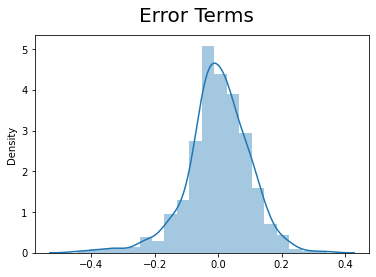

In [96]:
fig=plt.figure()
sns.distplot(y_train-y_train_cont,bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.show()

Error Terms -Linear Regression Assumptions:
1. Error terms are normally distributed with mean zero(not X, Y) - Plot above shows normal distribution
2. Error terms are independent of each other
3. Error terms have constant variance (homoscedasticity)

Plotting a couple of residuals show that there is not particular pattern. This is a good indicator of Independence

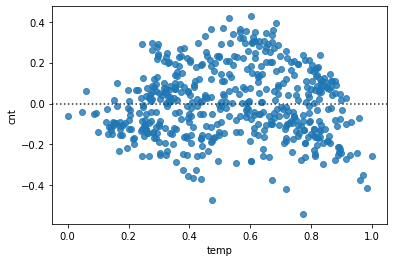

In [97]:
sns.residplot( x=x_train_new.temp, y=y_train, data=x_train_lm_WO_atemp, lowess=False, x_partial=None, y_partial=None, order=1, dropna=True, label="temp", color=None, scatter_kws=None, line_kws=None, ax=None)
plt.show()

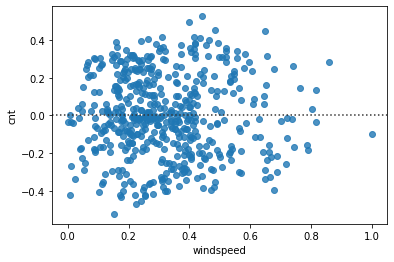

In [98]:
sns.residplot( x=x_train_new.windspeed, y=y_train, data=x_train_lm_WO_atemp, lowess=False, x_partial=None, y_partial=None, order=1, dropna=True, label="windspeed", color=None, scatter_kws=None, line_kws=None, ax=None)
plt.show()

### Making Predictions

#### Applying scaling to test

In [99]:
#numeric_vars=['atemp','temp','hum','windspeed','cnt']
df_test[numeric_vars] = scaler.transform(df_test[numeric_vars])
df_test

<ipython-input-99-df078d689038>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[numeric_vars] = scaler.transform(df_test[numeric_vars])
c:\users\sunny\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
184,3,0,7,1,1,0,2,0.831783,0.769660,0.657364,0.084219,0.692706
535,2,1,6,0,3,1,1,0.901354,0.842587,0.610133,0.153728,0.712034
299,4,0,10,0,4,1,2,0.511964,0.496145,0.837699,0.334206,0.303382
221,3,0,8,0,3,1,1,0.881625,0.795343,0.437098,0.339570,0.547400
152,2,0,6,0,4,1,1,0.817246,0.741471,0.314298,0.537414,0.569029
...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,1,2,0,0,0,2,0.257562,0.243430,0.708888,0.287411,0.336516
702,4,1,12,0,2,1,1,0.519232,0.511907,0.756118,0.283397,0.757478
127,2,0,5,0,0,0,1,0.584649,0.577380,0.650923,0.069510,0.495973
640,4,1,10,0,3,1,2,0.745598,0.682653,0.817947,0.052115,0.868615


Devide to x_test and y_test

In [100]:
y_test=df_test.pop('cnt')
y_test
x_test=df_test
x_train_lm_WO_atemp

,const,season,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed
653,1.0,4,1,0,2,1,1,0.509887,0.575354,0.300794
576,1.0,3,1,0,2,1,1,0.815169,0.725633,0.264686
426,1.0,1,1,0,6,0,2,0.442393,0.640189,0.255342
728,1.0,1,1,0,0,0,1,0.245101,0.498067,0.663106
482,1.0,2,1,0,6,0,2,0.395666,0.504508,0.188475
...,...,...,...,...,...,...,...,...,...,...
526,1.0,2,1,0,1,1,2,0.824514,0.605840,0.355596
578,1.0,3,1,0,4,1,1,0.863973,0.679690,0.187140
53,1.0,1,0,0,3,1,1,0.202618,0.435939,0.111379
350,1.0,4,0,0,6,0,2,0.248216,0.577930,0.431816


In [101]:
x_train_lm_WO_atemp.drop('const',axis=1,inplace=True)

x_train_lm_WO_atemp

,season,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed
653,4,1,0,2,1,1,0.509887,0.575354,0.300794
576,3,1,0,2,1,1,0.815169,0.725633,0.264686
426,1,1,0,6,0,2,0.442393,0.640189,0.255342
728,1,1,0,0,0,1,0.245101,0.498067,0.663106
482,2,1,0,6,0,2,0.395666,0.504508,0.188475
...,...,...,...,...,...,...,...,...,...
526,2,1,0,1,1,2,0.824514,0.605840,0.355596
578,3,1,0,4,1,1,0.863973,0.679690,0.187140
53,1,0,0,3,1,1,0.202618,0.435939,0.111379
350,4,0,0,6,0,2,0.248216,0.577930,0.431816


In [102]:
x_test_new=x_test[x_train_lm_WO_atemp.columns]
x_test_new=sm.add_constant(x_test_new)

In [103]:
x_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       219 non-null    float64
 1   season      219 non-null    int64  
 2   yr          219 non-null    int64  
 3   holiday     219 non-null    int64  
 4   weekday     219 non-null    int64  
 5   workingday  219 non-null    int64  
 6   weathersit  219 non-null    int64  
 7   temp        219 non-null    float64
 8   hum         219 non-null    float64
 9   windspeed   219 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 18.8 KB


In [104]:
lm_WO_atemp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     227.6
Date:                Sat, 23 Jan 2021   Prob (F-statistic):          1.47e-170
Time:                        20:44:56   Log-Likelihood:                 453.85
No. Observations:                 510   AIC:                            -887.7
Df Residuals:                     500   BIC:                            -845.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2220      0.030      7.444      0.000       0.163       0.281
season         0.0442      0.004     10.141      0.000       0.036       0.053
yr             0.2347      0.009     26.060      0.000       0.217       0.252
holiday       -0.0722      0.029     -2.469      0.014      -0.130      -0.015
weekday        0.0077      0.002      3.424      0.001       0.003       0.012
workingday     0.0194      0.010      1.972      0.049    6.71e-05       0.039
weathersit    -0.0816      0.010     -7.810      0.000      -0.102      -0.061
temp           0.4727      0.022     21.749      0.000       0.430       0.515
hum           -0.0907      0.041     -2.205      0.028      -0.172      -0.010
windspeed     -0.1665      0.028     -5.881      0.000      -0.222      -0.111
==============================================================================
Omnibus:                       56.392   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.747
Skew:                          -0.607   Prob(JB):                     4.95e-28
Kurtosis:                       5.109   Cond. No.                         51.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
y_test_nw_mdl=lm_WO_atemp.predict(x_test_new)

In [106]:
#compute r2 score
r2_score(y_true=y_test, y_pred=y_test_nw_mdl)
y_test.shape
#y_test_nw_mdl

(219,)

In [107]:
from sklearn.metrics import mean_squared_error
from math import sqrt
#rms = mean_squared_error(y_test, y_test_nw_mdl, squared=False)
rms = sqrt(mean_squared_error(y_test, y_test_nw_mdl))
rms

0.10151728037917895

It is visible that r2_score = 0.78 which is very close to .80 which is the model after dropping atemp from the rfe model.<br>
It can therefore be concluded that the test model is a good prediction based on the train set
The rms is also very low indicating a good test model.

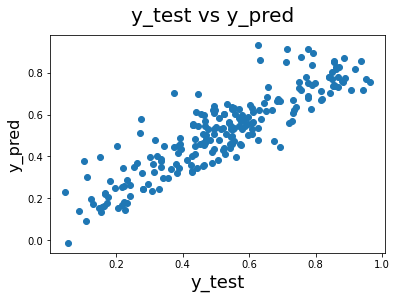

In [108]:
plt.scatter(y_test,y_test_nw_mdl)
plt.xlabel('y_test', fontsize = 18)     # X-label
plt.ylabel('y_pred', fontsize = 16)     #y_label
plt.suptitle('y_test vs y_pred', fontsize = 20)     # Plot heading 
plt.show()

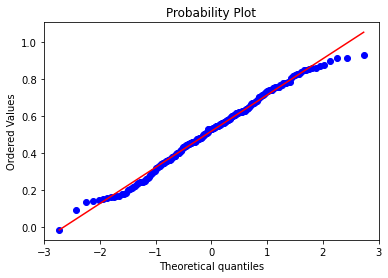

In [109]:
#QQ Plot
import scipy
scipy.stats.probplot(y_test_nw_mdl, dist="norm", plot=plt)
plt.show()

The QQ plot shows that the errors terms are normally distributed as they aling with the 45 degree line.

In [110]:
x_train_lm_WO_atemp

,season,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed
653,4,1,0,2,1,1,0.509887,0.575354,0.300794
576,3,1,0,2,1,1,0.815169,0.725633,0.264686
426,1,1,0,6,0,2,0.442393,0.640189,0.255342
728,1,1,0,0,0,1,0.245101,0.498067,0.663106
482,2,1,0,6,0,2,0.395666,0.504508,0.188475
...,...,...,...,...,...,...,...,...,...
526,2,1,0,1,1,2,0.824514,0.605840,0.355596
578,3,1,0,4,1,1,0.863973,0.679690,0.187140
53,1,0,0,3,1,1,0.202618,0.435939,0.111379
350,4,0,0,6,0,2,0.248216,0.577930,0.431816


## Annexure 
### Modeling to check weathersit

Predictor weathersit showed a very low P-value & thereofre a model with weathersit and other numeric variables were taken for modeling and it shows a similar4 R2 or adj R2 and low Fstat. However due to validation required on the efficacy of Anova and method at which the predictor was identified, it is kept in the Annexures.

In [111]:
bkshr_wthrsit=x_train_lm_WO_atemp.copy(deep=True)
bkshr_wthrsit.drop(['hum'],axis=1,inplace=True)
bkshr_wthrsit
bkshr_wthrsit

,season,yr,holiday,weekday,workingday,weathersit,temp,windspeed
653,4,1,0,2,1,1,0.509887,0.300794
576,3,1,0,2,1,1,0.815169,0.264686
426,1,1,0,6,0,2,0.442393,0.255342
728,1,1,0,0,0,1,0.245101,0.663106
482,2,1,0,6,0,2,0.395666,0.188475
...,...,...,...,...,...,...,...,...
526,2,1,0,1,1,2,0.824514,0.355596
578,3,1,0,4,1,1,0.863973,0.187140
53,1,0,0,3,1,1,0.202618,0.111379
350,4,0,0,6,0,2,0.248216,0.431816


In [112]:
bkshr_wthrsit=sm.add_constant(bkshr_wthrsit)
lm_bkshr_wthrsit=sm.OLS(y_train,bkshr_wthrsit).fit()
print(lm_bkshr_wthrsit.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     253.5
Date:                Sat, 23 Jan 2021   Prob (F-statistic):          9.98e-171
Time:                        20:44:57   Log-Likelihood:                 451.38
No. Observations:                 510   AIC:                            -884.8
Df Residuals:                     501   BIC:                            -846.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1819      0.024      7.664      0.0

R2, adj R2 and F stats are extremely good and would be a good candidate for a 

In [113]:
x_test.drop('hum',axis=1)
x_train_lm_WO_atemp.drop('hum',axis=1,inplace=True)
x_test_new_wthrsit=x_test[x_train_lm_WO_atemp.columns]
x_test_new_wthrsit=sm.add_constant(x_test_new_wthrsit)
x_test_new_wthrsit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       219 non-null    float64
 1   season      219 non-null    int64  
 2   yr          219 non-null    int64  
 3   holiday     219 non-null    int64  
 4   weekday     219 non-null    int64  
 5   workingday  219 non-null    int64  
 6   weathersit  219 non-null    int64  
 7   temp        219 non-null    float64
 8   windspeed   219 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 17.1 KB


In [114]:

y_test_nw_mdl_wthrsit=lm_bkshr_wthrsit.predict(x_test_new_wthrsit)

In [115]:
#compute r2 score
r2_score(y_true=y_test, y_pred=y_test_nw_mdl_wthrsit)

0.7786089428454814

In [116]:
from sklearn.metrics import mean_squared_error
from math import sqrt
#rms = mean_squared_error(y_test, y_test_nw_mdl, squared=False)
rms = sqrt(mean_squared_error(y_test, y_test_nw_mdl_wthrsit))
rms

0.10254339167786206

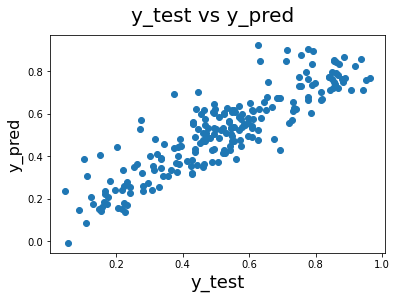

In [117]:
plt.scatter(y_test,y_test_nw_mdl_wthrsit)
plt.xlabel('y_test', fontsize = 18)     # X-label
plt.ylabel('y_pred', fontsize = 16)     #y_label
plt.suptitle('y_test vs y_pred', fontsize = 20)     # Plot heading 
plt.show()

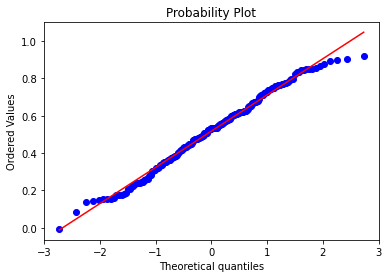

In [118]:
scipy.stats.probplot(y_test_nw_mdl_wthrsit, dist="norm", plot=plt)
plt.show()